In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
historico = pd.read_csv('diamonds.csv')
historico.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [4]:
rick = pd.read_csv('rick_diamonds.csv')
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [5]:
diamonds_v1 = rick
diamonds_v1['price_predicted'] = historico['price'].mean()
diamonds_v1.head()
diamonds_v1.to_csv('diamonds_v1.csv')

# Descriptive Statistics Review

## Before you start:

- Read the README.md file
- Comment as much as you can
- Happy learning!

## Context

![img](./diamonds.jpg)

In this lab we are going to work with data to understand the characteristics of a diamond that are most likely to influence its price. In this first part of the lab, we will explore and clean our data. 

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always, a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data. Don't worry about the seaborn and matplotlib import at the moment, you will learn more about them next week, but we will be using some of their functionalities.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First import the data from the .csv file provided and assign it to a variable named `diamonds` and drop the column with the index.

In [7]:
diamonds = pd.read_csv('diamonds.csv')
diamonds = diamonds.reset_index(drop=True)

# 1. Taking the first look at the data.

In [8]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [10]:
diamonds.shape

(48940, 10)

## Converting qualitative variables into numbers (quantitative variables)

In [11]:
diamonds['clarity'].unique()

array(['SI1', 'VS1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [12]:
diamonds.loc[diamonds['clarity'] == 'I1', 'clarity_num'] = 0
diamonds.loc[diamonds['clarity'] == 'SI1', 'clarity_num'] = 1
diamonds.loc[diamonds['clarity'] == 'SI2', 'clarity_num'] = 2
diamonds.loc[diamonds['clarity'] == 'VS1', 'clarity_num'] = 3
diamonds.loc[diamonds['clarity'] == 'VS2', 'clarity_num'] = 4
diamonds.loc[diamonds['clarity'] == 'VVS1', 'clarity_num'] = 5
diamonds.loc[diamonds['clarity'] == 'VVS2', 'clarity_num'] = 6
diamonds.loc[diamonds['clarity'] == 'IF', 'clarity_num'] = 7
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_num
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.0
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3.0
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.0
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.0
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,6.0


In [13]:
diamonds['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [17]:
diamonds.loc[diamonds['color'] == 'J', 'color_num'] = 0
diamonds.loc[diamonds['color'] == 'I', 'color_num'] = 1
diamonds.loc[diamonds['color'] == 'H', 'color_num'] = 2
diamonds.loc[diamonds['color'] == 'G', 'color_num'] = 3
diamonds.loc[diamonds['color'] == 'F', 'color_num'] = 4
diamonds.loc[diamonds['color'] == 'E', 'color_num'] = 5
diamonds.loc[diamonds['color'] == 'D', 'color_num'] = 6
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_num,color_num
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.0,5.0
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3.0,5.0
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.0,1.0
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.0,0.0
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,6.0,0.0


In [22]:
diamonds.loc[diamonds['cut'] == 'Fair', 'cut_num'] = 1
diamonds.loc[diamonds['cut'] == 'Good', 'cut_num'] = 2
diamonds.loc[diamonds['cut'] == 'Very Good', 'cut_num'] = 3
diamonds.loc[diamonds['cut'] == 'Premium', 'cut_num'] = 4
diamonds.loc[diamonds['cut'] == 'Ideal', 'cut_num'] = 5
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_num,color_num,cut_num
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.0,5.0,4.0
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3.0,5.0,2.0
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.0,1.0,4.0
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.0,0.0,2.0
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,6.0,0.0,3.0


In [23]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        48940 non-null  float64
 1   cut          48940 non-null  object 
 2   color        48940 non-null  object 
 3   clarity      48940 non-null  object 
 4   depth        48940 non-null  float64
 5   table        48940 non-null  float64
 6   price        48940 non-null  int64  
 7   x            48940 non-null  float64
 8   y            48940 non-null  float64
 9   z            48940 non-null  float64
 10  clarity_num  48940 non-null  float64
 11  color_num    48940 non-null  float64
 12  cut_num      48940 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 4.9+ MB


In [24]:
#checking types
print(diamonds['carat'].dtype)
print(diamonds['cut'].dtype)
print(diamonds['color'].dtype)
print(diamonds['clarity'].dtype)
print(diamonds['depth'].dtype)
print(diamonds['table'].dtype)
print(diamonds['price'].dtype)
print(diamonds['x'].dtype)
print(diamonds['y'].dtype)
print(diamonds['z'].dtype)
print(diamonds['clarity_num'].dtype)
print(diamonds['color_num'].dtype)

float64
object
object
object
float64
float64
int64
float64
float64
float64
float64
float64


# 2. A deeper look: checking the basic statistics.

In [25]:
diamonds.describe()

,carat,depth,table,price,x,y,z,clarity_num,color_num,cut_num
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.00000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648,3.08539,3.407254,3.906416
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817,1.76891,1.699858,1.116568
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,1.00000,2.000000,3.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,3.00000,3.000000,4.000000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,4.00000,5.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,7.00000,6.000000,5.000000


#### The columns x, y and z are the dimensions of the diamonds, so it doesn't make sense that they have a value of 0

In [38]:
len(diamonds.loc[(diamonds["x"] == 0) | (diamonds["y"] == 0) | (diamonds["z"] == 0)])

18

#### Let's correct these values by first calculating z, using the formula at the beginning of this notebook.

In [39]:
def calculate_z(a,b,c):
    return ((a/100) * (b + c) / 2)

In [40]:
diamonds['calculated_z'] = calculate_z(diamonds['depth'],diamonds['x'],diamonds['y'])
len(diamonds.loc[(diamonds["calculated_z"] == 0)])

6

In [41]:
diamonds.head(30)

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_num,color_num,cut_num,calculated_z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.0,5.0,4.0,2.311270
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3.0,5.0,2.0,2.310140
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.0,1.0,4.0,2.630160
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.0,0.0,2.0,2.750385
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,6.0,0.0,3.0,2.480600
5,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,5.0,1.0,3.0,2.470195
6,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,1.0,2.0,3.0,2.531710
7,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,3.0,2.0,3.0,2.390850
8,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73,1.0,0.0,2.0,2.729600
9,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46,3.0,0.0,5.0,2.458620


In [42]:
len(diamonds.loc[(diamonds["x"] == 0) | (diamonds["y"] == 0) | (diamonds["calculated_z"] == 0)])

7

In [43]:
diamonds.loc[diamonds["calculated_z"] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_num,color_num,cut_num,calculated_z
10825,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0,4.0,2.0,3.0,0.0
14433,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0,3.0,3.0,1.0,0.0
22240,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0,4.0,3.0,5.0,0.0
23795,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0,5.0,6.0,4.0,0.0
24864,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0,2.0,2.0,4.0,0.0
44936,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0,2.0,4.0,2.0,0.0


#### Analyzing the columns left with a value of 0 in Z, we can see that all dimensions (x, y, and z) are with this value. since keeping the values would probably affect our analysis negatively, we will replace the 0 values with "NaN" and disregard them.

In [44]:
cols = ["x","y","z",'calculated_z']
diamonds[cols] = diamonds[cols].replace({'0':np.nan, 0:np.nan})

In [45]:
len(diamonds.loc[(diamonds["x"] == 0) | (diamonds["y"] == 0) | (diamonds["z"] == 0) | (diamonds["calculated_z"] == 0)])

0

#### Since we need to be 100% sure of our data, let's create a function that validates our z. To do so, we will use the same formula, but this time we will calculate the value of depth with the new value assigned to z.

In [46]:
def validate_z(a, b):
    return a - b

diamonds['z_error'] = validate_z(diamonds['z'],diamonds['calculated_z'])
diamonds.loc[(diamonds["z_error"] > 0.5) | (diamonds["z_error"] < -0.4)]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_num,color_num,cut_num,calculated_z,z_error
2667,1.00,Very Good,J,SI2,62.8,63.0,3293,6.26,6.19,3.19,2.0,0.0,3.0,3.909300,-0.719300
4079,1.00,Fair,G,SI1,43.0,59.0,3634,6.32,6.27,3.97,1.0,3.0,1.0,2.706850,1.263150
9378,1.09,Ideal,J,VS2,43.0,54.0,4778,6.53,6.55,4.12,4.0,0.0,5.0,2.812200,1.307800
13228,1.07,Ideal,F,SI1,60.6,57.0,5909,6.62,6.67,1.07,1.0,4.0,5.0,4.026870,-2.956870
15924,1.00,Fair,D,VS1,55.9,60.0,7083,6.77,6.71,4.38,3.0,6.0,1.0,3.767660,0.612340
18737,1.53,Ideal,I,SI1,61.9,54.0,8971,7.43,7.50,1.53,1.0,1.0,5.0,4.620835,-3.090835
21828,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,2.0,2.0,4.0,19.728555,-11.668555
23751,2.01,Fair,G,SI2,65.6,56.0,15562,7.89,7.84,6.16,2.0,3.0,1.0,5.159440,1.000560
24018,2.06,Premium,H,SI2,60.0,60.0,16098,6.29,6.25,4.96,2.0,2.0,4.0,3.762000,1.198000
29999,0.34,Good,E,VS2,57.0,61.0,816,6.65,4.61,2.64,4.0,5.0,2.0,3.209100,-0.569100


In [47]:
diamonds.describe()

,carat,depth,table,price,x,y,z,clarity_num,color_num,cut_num,calculated_z,z_error
count,48940.000000,48940.000000,48940.000000,48940.000000,48933.000000,48934.000000,48922.000000,48940.00000,48940.000000,48940.000000,48934.000000,48922.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.731532,5.735037,3.539950,3.08539,3.407254,3.906416,3.539925,0.000225
std,0.474126,1.430026,2.233450,3989.333861,1.119905,1.143652,0.703679,1.76891,1.699858,1.116568,0.696143,0.144951
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.00000,0.000000,1.000000,2.038960,-11.668555
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,1.00000,2.000000,3.000000,2.910060,-0.001455
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,3.00000,3.000000,4.000000,3.522698,0.000000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,4.00000,5.000000,5.000000,4.036780,0.001480
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,7.00000,6.000000,5.000000,19.728555,28.626570


#### Let's check how many NaNs we have, and drop some of the rows.

In [48]:
nan_count = diamonds.isna().sum() 
nan_count

carat            0
cut              0
color            0
clarity          0
depth            0
table            0
price            0
x                7
y                6
z               18
clarity_num      0
color_num        0
cut_num          0
calculated_z     6
z_error         18
dtype: int64

In [49]:
diamonds = diamonds.dropna(subset=['x','calculated_z'])
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_num,color_num,cut_num,calculated_z,z_error
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.0,5.0,4.0,2.311270,-0.001270
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3.0,5.0,2.0,2.310140,-0.000140
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.0,1.0,4.0,2.630160,-0.000160
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.0,0.0,2.0,2.750385,-0.000385
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,6.0,0.0,3.0,2.480600,-0.000600


In [50]:
nan_count2 = diamonds.isna().sum() 
nan_count2

carat            0
cut              0
color            0
clarity          0
depth            0
table            0
price            0
x                0
y                0
z               11
clarity_num      0
color_num        0
cut_num          0
calculated_z     0
z_error         11
dtype: int64

# 3. Checking for outliers

In [51]:
diamonds.describe()

,carat,depth,table,price,x,y,z,clarity_num,color_num,cut_num,calculated_z,z_error
count,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000,48922.000000,48933.000000,48933.000000,48933.000000,48933.000000,48922.000000
mean,0.797748,61.751904,57.451041,3933.641592,5.731532,5.735018,3.539950,3.085382,3.407251,3.906484,3.539956,0.000225
std,0.474093,1.429933,2.232986,3988.524750,1.119905,1.143657,0.703679,1.768985,1.699909,1.116507,0.696117,0.144951
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000,1.000000,2.239050,-11.668555
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,1.000000,2.000000,3.000000,2.910060,-0.001455
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,3.000000,3.000000,4.000000,3.522750,0.000000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.040000,4.000000,5.000000,5.000000,4.036780,0.001480
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,7.000000,6.000000,5.000000,19.728555,28.626570


#### To manage these outliers, we are going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

In [52]:
diamonds.loc[diamonds["price"] > diamonds['price'].quantile(0.75)]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_num,color_num,cut_num,calculated_z,z_error
11563,1.20,Premium,F,SI2,62.5,59.0,5332,6.74,6.68,4.20,2.0,4.0,4.0,4.193750,0.006250
11564,1.27,Fair,H,SI2,65.2,54.0,5334,6.78,6.71,4.41,2.0,2.0,1.0,4.397740,0.012260
11565,1.02,Very Good,H,VS2,60.2,62.0,5335,6.46,6.54,3.91,4.0,2.0,3.0,3.913000,-0.003000
11566,0.90,Ideal,G,VVS2,61.9,56.0,5335,6.15,6.22,3.83,6.0,3.0,5.0,3.828515,0.001485
11567,0.90,Ideal,E,VS1,61.3,57.0,5335,6.20,6.24,3.81,3.0,5.0,5.0,3.812860,-0.002860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25148,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,1.0,2.0,3.0,5.008300,0.001700
25149,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,2.0,3.0,5.0,5.103125,0.006875
25150,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,7.0,3.0,5.0,4.559630,0.000370
25151,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,1.0,3.0,3.0,5.038725,0.001275


In [53]:
diamonds['price'].quantile(0.75)

5331.0

#### Our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will use a boxplot, which plots the median, 25th and 75th quartile, the maximum and minimum, as well as any outliers.

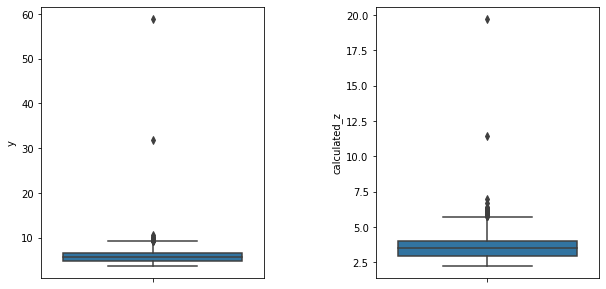

In [54]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

#### Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we know that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values higher than 10 in it.


In [55]:
diamonds.loc[(diamonds["y"] > 10) | (diamonds["calculated_z"] > 10)]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_num,color_num,cut_num,calculated_z,z_error
21828,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,2.0,2.0,4.0,19.728555,-11.668555
23577,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,0.0,1.0,4.0,6.173200,-0.003200
24851,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,0.0,0.0,1.0,6.969200,0.010800
25047,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,0.0,0.0,1.0,6.708310,0.011690
44603,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,3.0,5.0,5.0,11.417550,-6.297550


#### We can clearly see that the 31.8 in row 44603 is an outlier for the y value. Also, we can see that the 58.9 value for `y` in row 21828 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

In [63]:
def calculate_y(depth,x,z):
    return (200*z)/(depth * x)

In [64]:
diamonds.loc[diamonds['y'] > 30 , 'y'] = calculate_y(diamonds['depth'],diamonds['x'],diamonds['z'])
diamonds.loc[(diamonds["y"] > 10) | (diamonds["calculated_z"] > 10)]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_num,color_num,cut_num,calculated_z,z_error
21828,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,3.382994,8.06,2.0,2.0,4.0,19.728555,-11.668555
23577,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.100000,6.17,0.0,1.0,4.0,6.173200,-0.003200
24851,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.540000,6.98,0.0,0.0,1.0,6.969200,0.010800
25047,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.160000,6.72,0.0,0.0,1.0,6.708310,0.011690
44603,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,3.217394,5.12,3.0,5.0,5.0,11.417550,-6.297550


In [65]:
diamonds['z'] = calculate_z(diamonds['depth'],diamonds['x'],diamonds['y'])
diamonds.loc[(diamonds["y"] > 10) | (diamonds["z"] > 10)]

C:\Users\thoma\AppData\Local\Temp\ipykernel_6768\313015890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds['z'] = calculate_z(diamonds['depth'],diamonds['x'],diamonds['y'])


,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_num,color_num,cut_num,calculated_z,z_error
23577,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17320,0.0,1.0,4.0,6.17320,-0.00320
24851,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.96920,0.0,0.0,1.0,6.96920,0.01080
25047,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.70831,0.0,0.0,1.0,6.70831,0.01169


#### Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

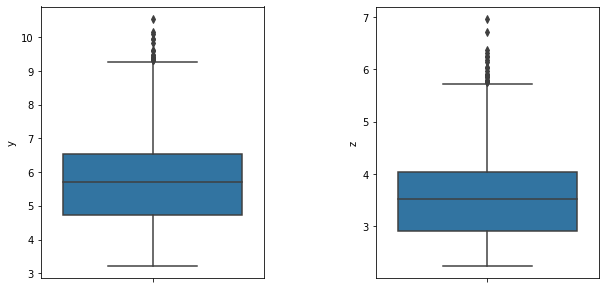

In [66]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

#### Now that we are done with the cleaning, let's generate a csv from this dataset and use it for EDA.

In [67]:
diamonds.to_csv('diamonds_clean.csv')